.........................  [ 25/50,    0.14sec avg, ETA 3.52 ]
.........................  [ 50/50,    0.14sec avg, ETA 0.00 ]

   0.14sec avg, 7.07 total



/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Prior on concentration parameters')

<Figure size 432x288 with 0 Axes>

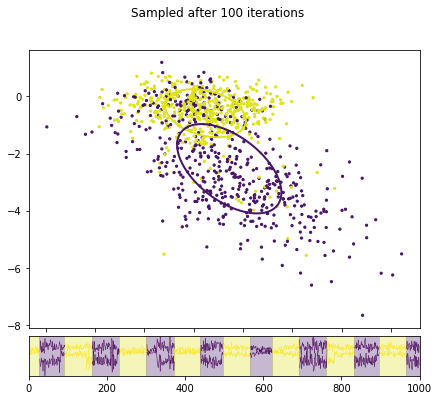

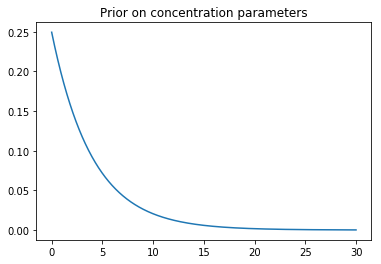

In [6]:
from __future__ import division
import numpy as np
np.seterr(divide='ignore') # these warnings are usually harmless for this code
from matplotlib import pyplot as plt
%matplotlib inline
import os
import scipy.stats as stats

import pyhsmm
from pyhsmm.util.text import progprint_xrange

###############
#  load data  #
###############

T = 1000
data = np.loadtxt('example-data.txt')[:T]

#########################
#  posterior inference  #
#########################

Nmax = 20
obs_dim = data.shape[1]
obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.25,
                'nu_0':obs_dim+2}
dur_hypparams = {'alpha_0':2*30*20,
                 'beta_0':2}

obs_distns = [pyhsmm.distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
dur_distns = [pyhsmm.distributions.PoissonDuration(**dur_hypparams) for state in range(Nmax)]

posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
        # NOTE: instead of passing in alpha_0 and gamma_0, we pass in parameters
        # for priors over those concentration parameters
    alpha=1.,gamma=1./4.,
#         alpha_a_0=6.,alpha_b_0=1./4,
#         gamma_a_0=6.,gamma_b_0=1./4,
        init_state_concentration=600.,
        obs_distns=obs_distns,
        dur_distns=dur_distns)
posteriormodel.add_data(data,trunc=70)

for idx in progprint_xrange(50):
    posteriormodel.resample_model()

plt.figure()
posteriormodel.plot()
plt.gcf().suptitle('Sampled after 100 iterations')

plt.figure()
t = np.linspace(0.01,30,1000)
plt.plot(t,stats.gamma.pdf(t,1.,scale=4.)) # NOTE: numpy/scipy scale is inverted compared to my scale
plt.title('Prior on concentration parameters')

# plt.show()